# Testing Area for Text Transformations

## Load Transforms

In [20]:
%reload_ext autoreload
%autoreload 2

In [21]:
from transforms import *
from utils import *

# SIB Transformations

### Positive Sentiment Link

In [24]:
transform = AddSentimentLink(sentiment='positive')
string_in = "I would describe this movie with one word:"
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

I would describe this movie with one word: https://www.dictionary.com/browse/humor


,task_name,tran_type,label_type
0,sentiment,SIB,soft
1,topic,INV,hard


### Negative Sentiment Link

0 is sad. 
1 is happy

In [6]:
t = AddNegativeLink()
X, y = "That SNL Skit", 0
new_X, new_y = t.transform_Xy(X, y)
print('new_X:', new_X, '\nnew_y:', new_y)
t.get_tran_types()

new_X: That SNL Skit https://www.dictionary.com/browse/unhelpful 
new_y: 0


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Add sentiment link

In [65]:
transform = AddSentimentLink(sentiment='negative')
string_in = "I would describe this movie with one word:"
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

I would describe this movie with one word: https://www.dictionary.com/browse/childish


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Add Positive Emoji

In [68]:
transform = AddPositiveEmoji()
string_in = 'The house is on fire!'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The house is on fire! 🎉


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Add Negative Emoji

In [73]:
transform = AddNegativeEmoji()
string_in = 'The house is on fire!'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The house is on fire! 🙅🏼‍♂️


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Remove Positive Emoji

In [59]:
transform = RemovePositiveEmoji()
string_in = 'The house is on fire! 💋💪🐮😟😱'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The house is on fire! 🐮😟😱


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Remove Negative Emoji

In [60]:
transform = RemoveNegativeEmoji()
string_in = 'The house is on fire! 😟😱🐮🛶💋💪'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The house is on fire! 🐮🛶💋💪


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Remove Negation

In [62]:
# !python -m spacy download en_core_web_sm
# from pattern import en

In [63]:
transform = RemoveNegation(task='sentiment')
string_in = "I didn't do nothing."
string_out = transform.transform_Xy(string_in, 1)
print(string_out)
transform.get_tran_types()

('I did do nothing.', 0)


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Add Negation

In [64]:
transform = AddNegation(task='sentiment')
string_in = "I want to live."
string_out = transform.transform_Xy(string_in, 1)
print(string_out)
transform.get_tran_types()

("I don't want to live.", 0)


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Insert Sentiment Phrase

In [55]:
transform = InsertSentimentPhrase()
string_in = 'The movie was derivative.'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The movie was derivative. That said, I couldn't be happier.


,task_name,tran_type
0,sentiment,SIB
1,topic,INV


### Antonym Replacement

In [76]:
transform = ChangeAntonym()
string_in = "The movie was bad"
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The movie was good


,task_name,tran_type
0,sentiment,SIB
1,topic,SIB


# INV Transformations

### Change Location

In [22]:
t = ChangeLocation()
X, y = "I live in Florida", 0
new_X, new_y = t.transform_Xy(X, y)
print('new_X:', new_X, '\nnew_y:', new_y)

new_X: I live in Faroe Islands 
new_y: 0


### Change Name

In [24]:
t = ChangeName()
X, y = "My name is Paul", 1
new_X, new_y = t.transform_Xy(X, y)
print('new_X:', new_X, '\nnew_y:', new_y)

new_X: My name is Tylynn 
new_y: 1


### Expand Contractions

In [29]:
transform = ExpandContractions()
string_in = "I can't even begin to tell you how much I shouldn't have said that."
string_out = transform(string_in)
print(string_out)

I cannot even begin to tell you how much I should not have said that.


### Contract Contractions

In [6]:
transform = ContractContractions()
string_in = "I cannot even begin to tell you how much I should not have said that."
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

I can't even begin to tell you how much I shouldn't have said that.


## Emojify

In [34]:
transform = Emojify()
string_in = 'The house is on fire!'
string_out = transform(string_in)
print(string_out)

The 🏠 is on 🔥!


### Add Neutral Emoji

In [30]:
transform = AddNeutralEmoji()
string_in = 'The house is on fire!'
string_out = transform(string_in)
print(string_out)

The house is on fire! 👩🏾‍🤝‍👨🏽


### Demojify

In [31]:
transform = Demojify()
string_in = 'The 🏠 is on 🔥!'
string_out = transform(string_in)
print(string_out)

The house is on fire!


### Remove Neutral Emoji

In [36]:
transform = RemoveNeutralEmoji()
string_in = 'The house is on fire! 🚝🐮🛶💋💪🔥😱'
string_out = transform(string_in)
print(string_out)

The house is on fire! 💋💪🔥😱


###  Change Number

In [39]:
transform = ChangeNumber(multiplier=10000, replacement=10)
string_in = "My paper has 3 citations."
string_out = transform(string_in)
print(string_out)

My paper has 10 citations.


### Synonym Replacement

In [41]:
transform = ChangeSynonym()
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)

The prompt brownish fox jumpstart over the lazy hound


### Hyponym Replacement

In [43]:
transform = ChangeHyponym()
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The quick brown fox carom over the lazy Leonberg


,task_name,tran_type
0,sentiment,INV
1,topic,SIB


### Hypernym Replacement

In [44]:
transform = ChangeHypernym()
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

The quick brown fox assault over the lazy person


,task_name,tran_type
0,sentiment,INV
1,topic,SIB


### Word Deletion

In [49]:
transform = WordDeletion(p=0.3)
string_in = "I love how you just wear anything."
string_out = transform(string_in)
print(string_out)

I love you just anything.


### Homoglyph swap

In [51]:
transform = HomoglyphSwap(change=0.75)
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)

Thе ԛսіϲk Ьⲅоԝո 𝚏о× ϳuｍpѕ оѵeⲅ 𝚝հe ⅼaᴢу ԁоɡ


### Random Swap

In [20]:
transform = RandomSwap(n=3)
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)

The the brown fox jumps over quick lazy dog


### Random Word Insertion

In [21]:
transform = RandomInsertion(n=4)
string_in = "The quick brown fox jumps over the lazy dog"
string_out = transform(string_in)
print(string_out)

The alternate alternate quick brown o'er fox jumps over the lazy track dog


### Import Link Text

In [54]:
transform = ImportLinkText()
string_in = 'This is a cool site: https://www.dictionary.com/browse/good?s=t'
string_out = transform(string_in)
print(string_out)
transform.get_tran_types()

This is a cool site:         DICTIONARY.COM THESAURUS.COM MEANINGS MEANINGS Emoji Slang Acronyms Pop Culture Memes Gender and Sexuality Mixed-up Meanings WORD GAMES WORD GAMES Quizzes Crossword Solver Scrabble Word Finder Words With Friends Cheat Daily Crossword Puzzle LEARN LEARN Online Tutors New Words Word Trends Word Facts 101 All About English Science and Technology Literature and Arts WRITING WRITING Grammar Coach Writing Prompts Grammar 101 Writing Tips Ways to Say It Better WORD OF THE DAY WORD OF THE DAY Word of the Day Synonym of the Day Word of the Year Word List Account Settings Subscriptions Help Center Sign Out DEFINITIONS SYNONYMS Search MEANINGS MEANINGS Emoji Slang Acronyms Pop Culture Memes Gender and Sexuality Mixed-up Meanings WORD GAMES WORD GAMES Quizzes Crossword Solver Scrabble Word Finder Words With Friends Cheat Daily Crossword Puzzle LEARN LEARN Online Tutors New Words Word Trends Word Facts 101 All About English Science and Technology Literature and Arts WRI

,task_name,tran_type
0,sentiment,INV
1,topic,INV


### Typos

### Translate

In [ ]:
# pip install google_trans_new

In [1]:
from google_trans_new import google_translator as Translator
from multiprocessing.dummy import Pool as ThreadPool
import functools
import itertools
import time

from diversity_metrics import *

In [2]:
langs = {
  'af': 'Afrikaans',
  'sq': 'Albanian',
  'ar': 'Arabic',
  'az': 'Azerbaijani',
  'eu': 'Basque',
  'bn': 'Bengali',
  'be': 'Belarusian',
  'bg': 'Bulgarian',
  'ca': 'Catalan',
  'zh-CN': 'Chinese Simplified',
  'zh-TW': 'Chinese Traditional',
  'hr': 'Croatian',
  'cs': 'Czech',
  'da': 'Danish',
  'nl': 'Dutch',
  'en': 'English',
  'eo': 'Esperanto',
  'et': 'Estonian',
  'tl': 'Filipino',
  'fi': 'Finnish',
  'fr': 'French',
  'gl': 'Galician',
  'ka': 'Georgian',
  'de': 'German',
  'el': 'Greek',
  'gu': 'Gujarati',
  'ht': 'Haitian Creole',
  'iw': 'Hebrew',
  'hi': 'Hindi',
  'hu': 'Hungarian',
  'is': 'Icelandic',
  'id': 'Indonesian',
  'ga': 'Irish',
  'it': 'Italian',
  'ja': 'Japanese',
  'kn': 'Kannada',
  'ko': 'Korean',
  'la': 'Latin',
  'lv': 'Latvian',
  'lt': 'Lithuanian',
  'mk': 'Macedonian',
  'ms': 'Malay',
  'mt': 'Maltese',
  'no': 'Norwegian',
  'fa': 'Persian',
  'pl': 'Polish',
  'pt': 'Portuguese',
  'ro': 'Romanian',
  'ru': 'Russian',
  'sr': 'Serbian',
  'sk': 'Slovak ',
  'sl': 'Slovenian',
  'es': 'Spanish',
  'sw': 'Swahili',
  'sv': 'Swedish',
  'ta': 'Tamil',
  'te': 'Telugu ',
  'th': 'Thai',
  'tr': 'Turkish',
  'uk': 'Ukrainian',
  'ur': 'Urdu',
  'vi': 'Vietnamese',
  'cy': 'Welsh',
  'yi': 'Yiddish'
}

### Single Translation

In [3]:
translator = Translator()  
x = 'basic human right'
x_fr = translator.translate(x, lang_tgt='fr').strip()
x_en = translator.translate(x_fr, lang_tgt='en').strip()
x_en

'fundamental human right'

### Bulk Translation

In [4]:
def request(text, lang='en'):
    t = Translator(timeout=5)
    # to not overwhelm the server and get banned
    time.sleep(1)
    translate_text = t.translate(text.strip(), lang).strip()
    return translate_text

In [158]:
def backtranslate(texts):
    back_translations = {}
    for lang in langs.keys():
        if lang != 'en':
            try:
                pool = ThreadPool(8)
                out = pool.map(functools.partial(request, lang=lang), texts)
                back = pool.map(functools.partial(request, lang='en'), out)
                back_translations[lang] = back
                pool.close()
                pool.join()
            except Exception as e:
                print('lang={}, Exception: {}'.format(lang, e))
                back_translations[lang] = []
        else:
            # just store it if it's already english
            back_translations[lang] = texts
    return back_translations

In [185]:
time1 = time.time()
# with open("../Plan+Write/rocstory_data/test.txt",'r') as f:
#     texts = f.readlines()[:1]
#     out = backtranslate(texts)
texts = ['midget']
out = backtranslate(texts)
time2 = time.time()
print("Translating %s docs into %s languages took %s seconds"%(len(texts), len(langs), time2 - time1))

lang=fr, Exception: 'list' object has no attribute 'strip'
lang=de, Exception: 'list' object has no attribute 'strip'
lang=it, Exception: 'list' object has no attribute 'strip'
lang=es, Exception: 'list' object has no attribute 'strip'
Translating 1 docs into 64 languages took 149.79594564437866 seconds


In [186]:
translations = list(itertools.chain(*list(out.values())))

In [187]:
td = TextDiversity(Z_type="token_semantics")

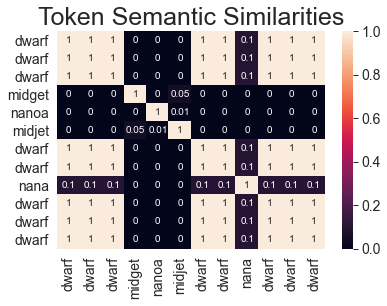

In [195]:
_ = td(translations, mean_adj=False)
td.get_species_heatmap(12)

In [198]:
td1 = TextDiversity(Z_type="token_semantics")(translations, mean_adj=False)
td2 = TextDiversity(Z_type="sentence_structure")(translations, mean_adj=False)
td3 = TextDiversity(Z_type="sentence_semantics")(translations, mean_adj=False)

print(td1, '\n', td2, '\n', td3)

{'diversity': 6.1142658419233396, 'diversity_normalized': 0.09553540378005218} 
 {'diversity': 1.205220670697126, 'diversity_normalized': 0.020087011178285433} 
 {'diversity': 5.483835549285682, 'diversity_normalized': 0.09139725915476136}


In [196]:
td1 = TextDiversity(Z_type="token_semantics")(translations, mean_adj=False)
td2 = TextDiversity(Z_type="sentence_structure")(translations, mean_adj=False)
td3 = TextDiversity(Z_type="sentence_semantics")(translations, mean_adj=False)

print(td1, '\n', td2, '\n', td3)

{'diversity': 8.632512378309283, 'diversity_normalized': 0.13488300591108254} 
 {'diversity': 1.205220670697126, 'diversity_normalized': 0.020087011178285433} 
 {'diversity': 7.337765674260706, 'diversity_normalized': 0.12229609457101177}


### QQP

In [70]:
import pandas as pd
from datasets import load_dataset

In [66]:
dataset = load_dataset('quora')['train']

Using custom data configuration default
Reusing dataset quora (C:\Users\fabri\.cache\huggingface\datasets\quora\default\0.0.0\2be517cf0ac6de94b77a103a36b141347a13f40637fbebaccb56ddbe397876be)


In [126]:
df = pd.DataFrame(dataset, columns=['is_duplicate', 'questions'])
df_q = pd.DataFrame(df.questions.tolist(), columns=['id', 'text'])
df['questions'] = df_q.text

In [133]:
diverse = df[~df.is_duplicate].questions.tolist()
not_diverse = df[df.is_duplicate].questions.tolist()

In [151]:
D = list(itertools.chain(*df[~df.is_duplicate].questions.tolist()))
ND = list(itertools.chain(*df[df.is_duplicate].questions.tolist()))

In [156]:
n = 100
D_ = D[:n]
ND_ = ND[:n]

td1 = TextDiversity(Z_type="token_semantics")(D_)
td2 = TextDiversity(Z_type="sentence_structure")(D_)
td3 = TextDiversity(Z_type="sentence_semantics")(D_)

print(td1, '\n', td2, '\n', td3)

td1 = TextDiversity(Z_type="token_semantics")(ND_)
td2 = TextDiversity(Z_type="sentence_structure")(ND_)
td3 = TextDiversity(Z_type="sentence_semantics")(ND_)

print(td1, '\n', td2, '\n', td3)

{'diversity': 147.33825032418625, 'diversity_normalized': 0.20549267827641038} 
 {'diversity': 1.748640107568536, 'diversity_normalized': 0.01748640107568536} 
 {'diversity': 83.64344145821617, 'diversity_normalized': 0.8364344145821617}
{'diversity': 139.46620128884788, 'diversity_normalized': 0.21791593951382482} 
 {'diversity': 1.7057979727908448, 'diversity_normalized': 0.017057979727908446} 
 {'diversity': 74.29327198755388, 'diversity_normalized': 0.7429327198755388}


### Diversity

In [50]:
td1 = TextDiversity(Z_type="token_semantics")(translations)
td2 = TextDiversity(Z_type="sentence_structure")(translations)
td3 = TextDiversity(Z_type="sentence_semantics")(translations)

print(td1, '\n', td2, '\n', td3)

td1 = TextDiversity(Z_type="token_semantics")(translations, remove_stopwords=False)
td2 = TextDiversity(Z_type="sentence_structure")(translations, remove_stopwords=False)
td3 = TextDiversity(Z_type="sentence_semantics")(translations, remove_stopwords=False)

print(td1, '\n', td2, '\n', td3)

{'diversity': 104.87444562471262, 'diversity_normalized': 0.050396177618795106} 
 {'diversity': 2.717766712960729, 'diversity_normalized': 0.04246510489001139} 
 {'diversity': 18.382294068251415, 'diversity_normalized': 0.28722334481642836}
{'diversity': 133.8976667976916, 'diversity_normalized': 0.03860947716196413} 
 {'diversity': 2.6048883348108682, 'diversity_normalized': 0.040701380231419816} 
 {'diversity': 18.3823077914102, 'diversity_normalized': 0.28722355924078435}


In [48]:
with open("../Plan+Write/rocstory_data/test.txt",'r') as f:
    texts = f.readlines()[:64]

In [51]:
td1 = TextDiversity(Z_type="token_semantics")(texts)
td2 = TextDiversity(Z_type="sentence_structure")(texts)
td3 = TextDiversity(Z_type="sentence_semantics")(texts)

print(td1, '\n', td2, '\n', td3)

td1 = TextDiversity(Z_type="token_semantics")(texts, remove_stopwords=False)
td2 = TextDiversity(Z_type="sentence_structure")(texts, remove_stopwords=False)
td3 = TextDiversity(Z_type="sentence_semantics")(texts, remove_stopwords=False)

print(td1, '\n', td2, '\n', td3)

{'diversity': 184.63740866701957, 'diversity_normalized': 0.09810701842030796} 
 {'diversity': 3.1870148326009913, 'diversity_normalized': 0.04979710675939049} 
 {'diversity': 52.02216321328905, 'diversity_normalized': 0.8128463002076414}
{'diversity': 188.55639500979126, 'diversity_normalized': 0.057803922443222334} 
 {'diversity': 3.4147591909371484, 'diversity_normalized': 0.053355612358392944} 
 {'diversity': 52.019688703602164, 'diversity_normalized': 0.8128076359937838}


# New News Dataset

In [96]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import pandas as pd
from datasets import load_dataset, Dataset

In [99]:
cats = [
    'talk.politics.mideast',                                # Wolrd 0
    'rec.sport.hockey', 'rec.sport.baseball',               # Sports 1
    # 'misc.forsale',                                       # Business 2
    'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', # Sci/Tech 3
]

dataset = fetch_20newsgroups(
    subset='all',
    categories=cats,
    remove=('headers', 'footers', 'quotes')
)

df = pd.DataFrame([dataset.data, dataset.target]).T
df.rename(columns={0:'text', 1: 'label'}, inplace=True)

mapper = {
    0: 1,
    1: 1,
    2: 3,
    3: 3,
    4: 3,
    5: 3,
    6: 0,
}

df.label = df.label.map(mapper)
df.text = df.text.replace('\n', ' ', regex=True).str.strip()

test_dataset = Dataset.from_pandas(df)

In [ ]:
# 20_newsgroups classes
# ['alt.atheism',
#  'comp.graphics',
#  'comp.os.ms-windows.misc',
#  'comp.sys.ibm.pc.hardware',
#  'comp.sys.mac.hardware',
#  'comp.windows.x',
#  'misc.forsale',
#  'rec.autos',
#  'rec.motorcycles',
#  'rec.sport.baseball',
#  'rec.sport.hockey',
#  'sci.crypt',
#  'sci.electronics',
#  'sci.med',
#  'sci.space',
#  'soc.religion.christian',
#  'talk.politics.guns',
#  'talk.politics.mideast',
#  'talk.politics.misc',
#  'talk.religion.misc']

# ag_news labels
# World (0), 
# Sports (1), 
# Business (2), 
# Sci/Tech (3).